<font size="14"> Práctica 4: Métodos lineales multipaso  </font> 

Ana Gil, Wenya Zhong

<font size="5"> **Ejercicio 1**  </font> 

Para el cálculo de la solución númerica de un P.V.I. de la forma $y’=f(t,y)$ con $y(t_0)=y_0$, si integramos 
$y’=f(t,y)$  de $t_n$ a $t_{n+1}$ se tiene:

\begin{equation}
      y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} f(t,y(t))\, dt
\end{equation}
 
Para obtener la fórmula de Adams-Bashforth de orden 2, basta calcular:


 
\begin{equation}
      y_{n+1} = y_n + \int_{t_n}^{t_{n+1}} P(t)\, dt.
\end{equation}
 
 
donde $P$ es el polinomio interpolador que pasa por los puntos  [$t_n,\,f_n$], [$t_{n-1},\,f_{n-1}$]. Si en cambio, 
consideramos  para  el  interpolador  $P$  los  puntos [$t_n,\,f_n$], [$t_{n+1},\,f_{n+1}$] el  método  resultante  será implícito y daría lugar al método de Adams-Moulton de orden 2. Se os pide generalizar este proceso para 
orden $k$, siendo $k$ un entero positivo cualquiera e implementarlo para obtener automáticamente 
las fórmulas de Adams-Bashforth y Adams-Moulton en Python tal y como se define en los siguientes apartados:  
 
  a) Crear un procedimiento *AdamsB* que tenga como parámetro de entrada un entero positivo $k$ y 
devuelva la expresión de la fórmula de Adams-Bashforth de orden $k$.  
 
  b) Crear un procedimiento en *AdamsM* que tenga como parámetro de entrada un entero positivo 
k y devuelva la expresión de la fórmula de Adams-Moulton de orden $k$.

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


class LagrangePoly:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        b = [(x - self.X[m]) / (self.X[j] - self.X[m])
             for m in range(self.n) if m != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)


In [3]:
def AdamsM(k):
    T=[0]*k 
    F=[0]*k 
    t_n,h,x, yn, yn1=sym.symbols('t_n h x y_{n} y_{n+1)')
    
    T[0]=t_n+h
    F[0]=sym.Symbol("f_{n+1}")
    T[1]=t_n
    F[1]=sym.Symbol("f_n")
    for i in range(1,k-1):
        T[i+1]=t_n-i*h
        F[i+1]=sym.Symbol("f_{n-%s}"%i)

    p=LagrangePoly(T, F)
    P=sym.simplify(p.interpolate(x))
    IP=sym.integrate(P,(x,t_n,t_n+h))
    phi=sym.simplify(IP)
    return yn+phi

def AdamsB(k):
    T=[0]*k 
    F=[0]*k 
    t_n,h,x, yn, yn1=sym.symbols('t_n h x y_{n} y_{n+1)')
    
    T[0]=t_n
    F[0]=sym.Symbol("f_n")
    for i in range(1,k):
        T[i]=t_n-i*h
        F[i]=sym.Symbol("f_{n-%s}"%i)
  
    p=LagrangePoly(T, F)
    P=sym.simplify(p.interpolate(x))
    IP=sym.integrate(P,(x,t_n,t_n+h))
    hphi=sym.simplify(IP)
    return yn+hphi

Estos programas, AdamsB y AdamsM, calculan las fórmulas de los métodos de Adams, del orden que se especifique, que dan lugar a los métodos de Admas-Bashford y Adams-Moulton respectivamente.

In [4]:
AdamsB(2)

h*(3*f_n - f_{n-1})/2 + y_{n}

In [5]:
from IPython.display import display, Math
print('Método de Adams-Bashford de orden 2: ') 
display(Math('y_{n+1}=%s'%AdamsB(2)))

Método de Adams-Bashford de orden 2: 


<IPython.core.display.Math object>

In [6]:
AdamsM(2)

h*(f_n + f_{n+1})/2 + y_{n}

In [7]:
display(Math('Adams-Moulton\ \ de\ \ orden\ \ 2,\ y_{n+1}=%s'%AdamsM(2)))

<IPython.core.display.Math object>

In [8]:
AdamsB(3)

h*(23*f_n - 16*f_{n-1} + 5*f_{n-2})/12 + y_{n}

In [9]:
AdamsM(3)

h*(8*f_n + 5*f_{n+1} - f_{n-1})/12 + y_{n}

In [10]:
AdamsB(4)

h*(55*f_n - 59*f_{n-1} + 37*f_{n-2} - 9*f_{n-3})/24 + y_{n}

In [11]:
AdamsM(4)

h*(19*f_n + 9*f_{n+1} - 5*f_{n-1} + f_{n-2})/24 + y_{n}

Trabajaremos con los métodos de ordenes 2,3 y 4, pero realmente podemos calcular los método de Adams de cualquier orden, por ejemplo,

In [12]:
print('Método de Adams-Bashforth de orden 7: ') 
display(Math('y_{n+1}=%s'%AdamsB(7)))

Método de Adams-Bashforth de orden 7: 


<IPython.core.display.Math object>

In [13]:
print('Método de Adams-Moulton de orden 7: ') 
display(Math('y_{n+1}=%s'%AdamsM(7)))

Método de Adams-Moulton de orden 7: 


<IPython.core.display.Math object>

### Indicaciones

Se aconseja definir las funciones de los métodos como funciones auxiliares  que calculen un paso, y en el caso de los métodos multipaso que tengan como parametro de entrada las fi's anteriores necesarias para la evaluación del método. Esto es: 

In [14]:
def RKC(f,x0,y0,h):
    k1 = f(x0,y0)
    k2 = f(x0+1/2*h,y0+1/2*h*k1)
    k3 = f(x0+1/2*h,y0+1/2*h*k2)
    k4 = f(x0+h,y0+h*k3)
    return y0+1/6*h*(k1+2*k2+2*k3+k4)

def AB2(f1,f2,y,h):
    return y+h/2*(3*f2-f1)

def AM2(f2,f3p,y,h):
    return y+h/2*(f3p+f2)

def AB3(f1,f2,f3,y,h):
    return y+h/12*(23*f3-16*f2+5*f1)

def AM3(f2,f3,f4p,y,h):
    return y+h/12*(5*f4p+8*f3-f2)

def AB4(f1,f2,f3,f4,y,h):
    return y+h/24*(55*f4-59*f3+37*f2-9*f1)

def AM4(f2,f3,f4,f5p,y,h):
    return y+h/24*(9*f5p+19*f4-5*f3+f2)

def DESOLVE_AB(pvi,rng,**kwargs):
    f = pvi[0]
    x0 = pvi[1][0] ; y0 = pvi[1][1]
    a = rng[0] ; b = rng[1]
    pasos = kwargs.get('pasos')
    orden= kwargs.get('orden')
    opc = [k for k in kwargs]
    if not 'pasos' in opc: pasos = 20
    if not 'orden' in opc: orden = 4
    if type(pasos) != int or pasos <= 0:
        print('ERROR. La opción pasos debe ser un número natural.')
        sys.exit() 
    if orden not in [2, 3, 4]:
        print('ERROR. La opción orden debe tomar los valores 2, 3 o 4.')
        sys.exit()
        
    X = [x0]
    Y = [y0]
    h = (b-a)/pasos

    if orden == 2:
        Y.append(RKC(f,X[0],Y[0],h))
        X.append(X[0]+h)
        f1=f(X[-2],Y[-2])
        for j in range(0,pasos-1):      
            f2=f(X[-1],Y[-1])
            Y.append(AB2(f1,f2,Y[-1],h))
            X.append(X[-1]+h)
            f1=f2
            
    if orden == 3:
        for i in range(0,2):
            Y.append(RKC(f,X[i],Y[i],h))
            X.append(X[i]+h)
        f1=f(X[-3],Y[-3])
        f2=f(X[-2],Y[-2])
        for j in range(0,pasos-2):
            f3=f(X[-1],Y[-1])
            Y.append(AB3(f1,f2,f3,Y[-1],h))
            X.append(X[-1]+h)
            f1=f2
            f2=f3
            
    if orden == 4:
        for i in range(0,3):
            Y.append(RKC(f,X[i],Y[i],h))
            X.append(X[i]+h)
        f1=f(X[-4],Y[-4])
        f2=f(X[-3],Y[-3])
        f3=f(X[-2],Y[-2])
        for j in range(0,pasos-3):
            f4=f(X[-1],Y[-1])
            Y.append(AB4(f1,f2,f3,f4,Y[-1],h))
            X.append(X[-1]+h)
            f1=f2
            f2=f3
            f3=f4
    S = np.zeros((pasos+1, 2)) 
    S[:,0]=X
    S[:,1]=Y
    return S

<font size="5"> **Ejercicio 2**  </font> 

Crear  un  procedimiento  <span style="color:blue"> **DESOLVE_PC**</span>  que  calcule  la  solución  numérica  de un  P.V.I.  mediante  el  método 
predictor-corrector, que calcula la solución numérica con el método de Adams Moulton utilizando como predictor el Adams Bashforth. Se implementará en paso fijo aplicando el corrector una sóla vez. 
 
El  método se inicializará  calculando  las  condiciones  iniciales 
adicionales mediante un método de Runge-Kutta clásico de orden 4.

<span style="color:blue"> **Parámetros de entrada:** </span> 

- **pvi**:  el problema de valor inicial como [f, ci]
- **rng**: rango de integración de la forma [a,b]

<span style="color:blue"> **Opciones:** </span>

-**orden=k**, el orden del método a utilizar $k=2,3,$ ó $4$, por defecto $k=4$.

-**pasos=n**,  el número de puntos en los que se desea dar el valor aproximado de la solución, por defecto 
$n=20$  ($n$ ha de ser un entero positivo).

-**corrector=n**, donde n será un entero positivo que indica el número de veces que se ha de aplicar el corrector, por defecto n=1. 

-**soln1=True,Falso**, Esta opción funciona como un interruptor booleano, permitiendo dos valores posibles: True (verdadero) o False (falso). Cuando se activa esta opción, el procedimiento debe devolver, para cada método de orden $n$, la solución generada por el método asociado de orden $n+1$. Su valor por defecto es "False". <span style="color:red">**OPCIONAL**</span>.

<span style="color:blue">**Salida:** </span> El procedimiento devolverá la solución numérica del PVI dado en [a,b] como un array de dimensión *pasos+1 x 2* .



 


In [15]:
def DESOLVE_PC(pvi, rng, **kwargs):
    '''Función que usa el método predictor-corrector, que calcula la solución numérica con el método de
    Adams Moulton utilizando como predictor el Adams Bashforth para hallar una solución numérica en rng del PVI.
    
    Parámetros a introducir:
     pvi = [f, ci] = donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y ci es la condición inicial [x0,y0] 
     rng = [a,b] un intervalo conteniendo el valor inicial x0 de la variable independiente'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rng[0]; b = rng[1]
    x0 = ci[0]; y0 = ci[1]
    
    # Lectura de opciones
    orden=kwargs.get("orden")
    pasos=kwargs.get("pasos")
    corrector=kwargs.get("corrector")
    soln1=kwargs.get("soln1")
    
    # Asignación de valores por defecto
    opc=[k for k in kwargs]
    if not "orden" in opc:
        orden=4
    if not "pasos" in opc:
        pasos=20
    if not "corrector" in opc:
        corrector=1
    if not "soln1" in opc:
        soln1='False'
        
    # Comprobaciones
    if orden not in [2,3,4]:
        sys.exit('Error: el orden introducido "{0}" no es "2", "3" ni "4".'.format(orden))
    if type(pasos) != int or pasos <= 0:
        sys.exit('Error: el número de pasos introducido "{0}" no es un entero positivo.'.format(pasos))
    if type(corrector) != int or corrector <= 0:
        sys.exit('Error: el número de veces que se ha de aplicar el corrector "{0}" no es un entero positivo.'.format(pasos))
    if soln1 not in ["True","False"]:
        sys.exit('Error: el valor de soln1 introducido "{0}" no es "True" ni "False".'.format(orden))
        
    # Tamaño de paso
    h = (b-a)/pasos
    
    # Nodo más próximo a ci
    nodos=np.zeros(pasos+1)
    for i in range(0,pasos+1): 
        nodos[i]=a+i*h
    k=np.argmin(abs(nodos-x0))
    xk=nodos[k]
    
    # Trasladar y0 al nodo con Runge-Kutta clásico
    yk = RKC(f,x0,y0,abs(xk-x0))
    
    # Método hacia adelante
    X1 = [xk]
    Y1 = [yk]
    
    if orden == 2:
        Y1.append(RKC(f,X1[0],Y1[0],h))
        X1.append(X1[0]+h)
        f1=f(X1[-2],Y1[-2])
        for j in range(0,pasos-k-1):      
            f2=f(X1[-1],Y1[-1])
            Y3p = AB2(f1,f2,Y1[-1],h)
            f3p=f(X1[-1]+h,Y3p)
            for i in range(0,corrector):
                Y3c = AM2(f2,f3p,Y1[-1],h)
                f3p = f(X1[-1]+h,Y3c)
            if soln1 == "False":
                Y1.append(Y3c)
            elif soln1 == "True":
                Y1.append(1/6*(Y3p+5*Y3c))
            X1.append(X1[-1]+h)
            f1=f2
            
    if orden == 3:
        for i in range(0,2):
            Y1.append(RKC(f,X1[i],Y1[i],h))
            X1.append(X1[i]+h)
        f1=f(X1[-3],Y1[-3])
        f2=f(X1[-2],Y1[-2])
        for j in range(0,pasos-k-2):
            f3=f(X1[-1],Y1[-1])
            Y4p = AB3(f1,f2,f3,Y1[-1],h)
            f4p = f(X1[-1]+h,Y4p)
            for i in range(0,corrector):
                Y4c = AM3(f2,f3,f4p,Y1[-1],h)
                f4p = f(X1[-1]+h,Y4c)
            if soln1 == "False":
                Y1.append(Y4c)
            elif soln1 == "True":
                Y1.append(1/10*(Y4p+9*Y4c))
            X1.append(X1[-1]+h)
            f1=f2
            f2=f3
            
    if orden == 4:
        for i in range(0,3):
            Y1.append(RKC(f,X1[i],Y1[i],h))
            X1.append(X1[i]+h)
        f1=f(X1[-4],Y1[-4])
        f2=f(X1[-3],Y1[-3])
        f3=f(X1[-2],Y1[-2])
        for j in range(0,pasos-k-3):
            f4=f(X1[-1],Y1[-1])
            Y5p = AB4(f1,f2,f3,f4,Y1[-1],h)
            f5p = f(X1[-1]+h,Y5p)
            for i in range(0,corrector):
                Y5c = AM4(f2,f3,f4,f5p,Y1[-1],h)
                f5p = f(X1[-1]+h,Y5c)
            if soln1 == "False":
                Y1.append(Y5c)
            elif soln1 == "True":
                Y1.append(1/270*(19*Y5p+251*Y5c))
            X1.append(X1[-1]+h)
            f1=f2
            f2=f3
            f3=f4
            
    # Método hacia atrás
    X2 = [xk]
    Y2 = [yk]
    
    if orden == 2:
        Y2.append(RKC(f,X2[0],Y2[0],-h))
        X2.append(X2[0]-h)
        f1=f(X2[-2],Y2[-2])
        for j in range(0,k-1):      
            f2=f(X2[-1],Y2[-1])
            Y3p = AB2(f1,f2,Y2[-1],-h)
            f3p=f(X2[-1]-h,Y3p)
            for i in range(0,corrector):
                Y3c = AM2(f2,f3p,Y2[-1],-h)
                f3p = f(X2[-1]-h,Y3c)
            if soln1 == "False":
                Y2.append(Y3c)
            elif soln1 == "True":
                Y2.append(1/6*(Y3p+5*Y3c))
            X2.append(X2[-1]-h)
            f1=f2
            
    if orden == 3:
        for i in range(0,2):
            Y2.append(RKC(f,X2[i],Y2[i],-h))
            X2.append(X2[i]-h)
        f1=f(X2[-3],Y2[-3])
        f2=f(X2[-2],Y2[-2])
        for j in range(0,k-2):
            f3=f(X2[-1],Y2[-1])
            Y4p = AB3(f1,f2,f3,Y2[-1],-h)
            f4p = f(X2[-1]-h,Y4p)
            for i in range(0,corrector):
                Y4c = AM3(f2,f3,f4p,Y2[-1],-h)
                f4p = f(X2[-1]-h,Y4c)
            if soln1 == "False":
                Y2.append(Y4c)
            elif soln1 == "True":
                Y2.append(1/10*(Y4p+9*Y4c))
            X2.append(X2[-1]-h)
            f1=f2
            f2=f3
            
    if orden == 4:
        for i in range(0,3):
            Y2.append(RKC(f,X2[i],Y2[i],-h))
            X2.append(X2[i]-h)
        f1=f(X2[-4],Y2[-4])
        f2=f(X2[-3],Y2[-3])
        f3=f(X2[-2],Y2[-2])
        for j in range(0,k-3):
            f4=f(X2[-1],Y2[-1])
            Y5p = AB4(f1,f2,f3,f4,Y2[-1],-h)
            f5p = f(X2[-1]-h,Y5p)
            for i in range(0,corrector):
                Y5c = AM4(f2,f3,f4,f5p,Y2[-1],-h)
                f5p = f(X2[-1]-h,Y5c)
            if soln1 == "False":
                Y2.append(Y5c)
            elif soln1 == "True":
                Y2.append(1/270*(19*Y5p+251*Y5c))
            X2.append(X2[-1]-h)
            f1=f2
            f2=f3
            f3=f4
    
    S = np.zeros((pasos+1,2))
    if xk == a:
        S[:,0]=X1
        S[:,1]=Y1
    elif a < xk < b:
        S[:,0]=np.concatenate((X2[1:][::-1],X1))
        S[:,1]=np.concatenate((Y2[1:][::-1],Y1))
    elif xk == b:
        S[:,0]=X2[::-1]
        S[:,1]=Y2[::-1]
        
    return S

In [16]:
# Comprobación

def f2(x,y):
    return x+y-1

pvi = [f2,[0,1]]
rng = [0,0.8]

DESOLVE_PC(pvi,rng,orden=2,pasos=4)

array([[0.        , 1.        ],
       [0.2       , 1.0214    ],
       [0.4       , 1.092322  ],
       [0.6       , 1.22334206],
       [0.8       , 1.42778751]])

<font size="5"> **Ejercicio 3**  </font> 

Dado el P.V.I.  $y’=1-y+x$ con c.i. $y(0)=1$ y cuya solución exacta es $y(x)=x+e^{-x}$:

  a)  Usar  el  procedimiento  programado  en  el  Ejercicio  2  para  resolver  el  P.V.I.  en  el  intervalo 
$[0,\,1]$, con ordenes $2$ y $4$, y con  tamaños de paso $2^{-k}$, para k=3 y 6.
  
  b) Comparar los resultados obtenidos en el apartado anterior con la solución exacta y con las 
soluciones numéricas que proporcionan los métodos de Adams-Bashforth de mismo orden 
(sin corrección) y con los mismos tamaños de paso que en el apartado (a).

  c) Comparar los resultados obtenidos en el apartado (a) con las 
soluciones numéricas obtenidas con los mismos ordenes y tamaño de paso pero aplicando 2 y 3 veces el corrector. 

In [17]:
def f3(x,y):
    return 1-y+x

pvi = [f3,[0,1]]
rng = [0,1]

# Predictor-Corrector
S23 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**3)
S26 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**6)

S43 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**3)
S46 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**6)

In [18]:
# Solución exacta
def f3_sol(x):
    return (x+np.exp(-x))

SolEx3 = f3_sol(S23[:,0])
SolEx6 = f3_sol(S26[:,0])

# Errores
E23 = abs(S23[:,1]-SolEx3)
E26 = abs(S26[:,1]-SolEx6)
E43 = abs(S43[:,1]-SolEx3)
E46 = abs(S46[:,1]-SolEx6)

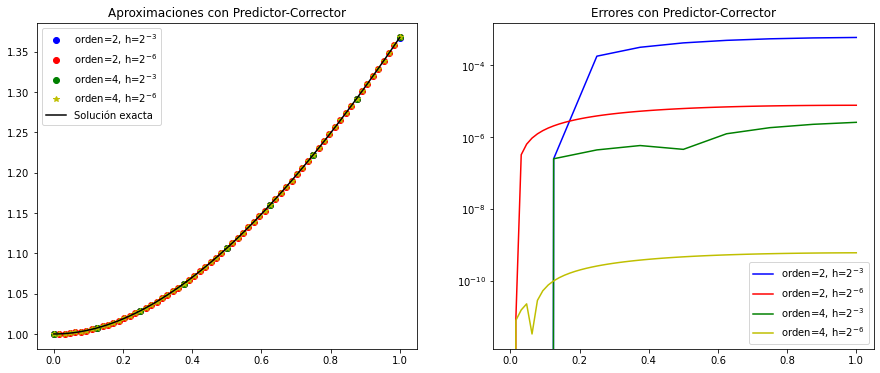

In [19]:
# Gráficas Predictor-Corrector

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S23[:,0],S23[:,1],'ob',label='orden=2, h=$2^{-3}$')
plt.plot(S26[:,0],S26[:,1],'or',label='orden=2, h=$2^{-6}$')
plt.plot(S43[:,0],S43[:,1],'og',label='orden=4, h=$2^{-3}$')
plt.plot(S46[:,0],S46[:,1],'*y',label='orden=4, h=$2^{-6}$')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con Predictor-Corrector')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S23[:,0],E23,'b',label='orden=2, h=$2^{-3}$')
plt.plot(S26[:,0],E26,'r',label='orden=2, h=$2^{-6}$')
plt.plot(S43[:,0],E43,'g',label='orden=4, h=$2^{-3}$')
plt.plot(S46[:,0],E46,'y',label='orden=4, h=$2^{-6}$')
plt.title('Errores con Predictor-Corrector')
plt.legend(loc='best')
plt.yscale("log")

Observamos que, fijado un orden, los errores son menores para $h=2^{-6}$ que para $h=2^{-3}$, es decir, cuanto menor es $h$, menores son los errores que se obtienen. Por otro lado, fijado un $h$, los errores con orden 2 son mayores que con orden 4, es decir, a mayor orden, menor error. Por ello, los mayores errores se obtienen con orden 2 y $h=2^{-3}$, y los menores se obtienen con orden 4 y $h=2^{-6}$.

In [21]:
# Adams-Bashforth
AB23 = DESOLVE_AB(pvi,rng,orden=2,pasos=2**3)
AB26 = DESOLVE_AB(pvi,rng,orden=2,pasos=2**6)

AB43 = DESOLVE_AB(pvi,rng,orden=4,pasos=2**3)
AB46 = DESOLVE_AB(pvi,rng,orden=4,pasos=2**6)

# Errores
EAB23 = abs(AB23[:,1]-SolEx3)
EAB26 = abs(AB26[:,1]-SolEx6)
EAB43 = abs(AB43[:,1]-SolEx3)
EAB46 = abs(AB46[:,1]-SolEx6)

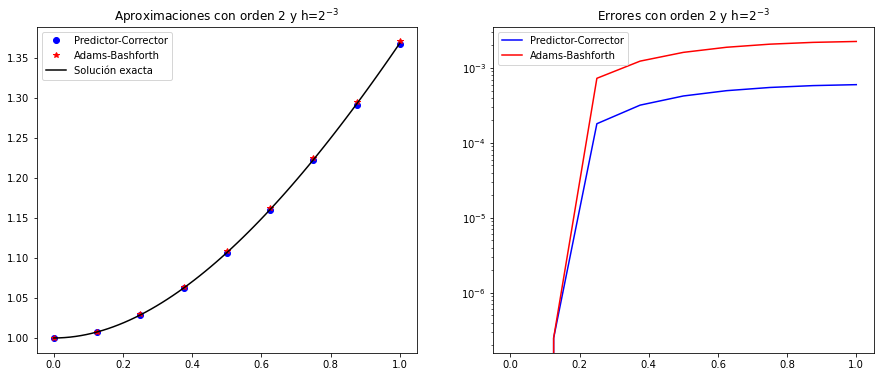

In [60]:
# Gráficas con orden 2 y h=2^(-3)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S23[:,0],S23[:,1],'ob',label='Predictor-Corrector')
plt.plot(AB23[:,0],AB23[:,1],'*r',label='Adams-Bashforth')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 2 y h=$2^{-3}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S23[:,0],E23,'b',label='Predictor-Corrector')
plt.plot(AB23[:,0],EAB23,'r',label='Adams-Bashforth')
plt.title('Errores con orden 2 y h=$2^{-3}$')
plt.legend(loc='best')
plt.yscale('log')

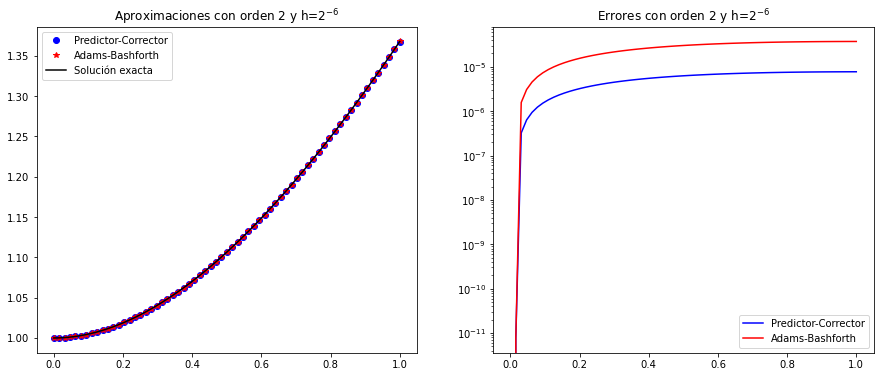

In [61]:
# Gráficas con orden 2 y h=2^(-6)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S26[:,0],S26[:,1],'ob',label='Predictor-Corrector')
plt.plot(AB26[:,0],AB26[:,1],'*r',label='Adams-Bashforth')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 2 y h=$2^{-6}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S26[:,0],E26,'b',label='Predictor-Corrector')
plt.plot(AB26[:,0],EAB26,'r',label='Adams-Bashforth')
plt.title('Errores con orden 2 y h=$2^{-6}$')
plt.legend(loc='best')
plt.yscale('log')

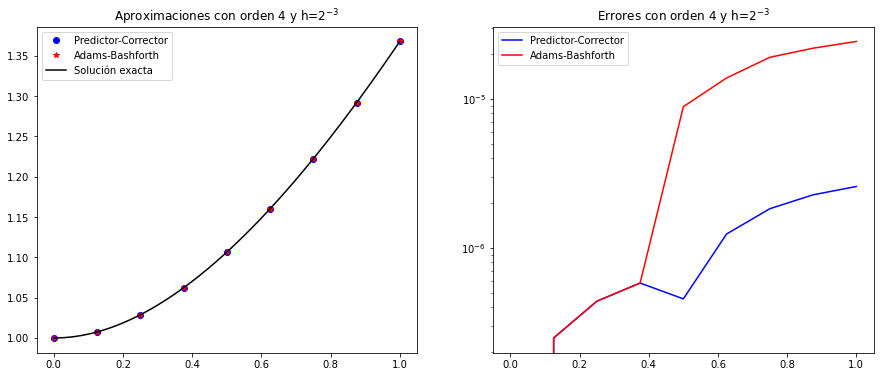

In [24]:
# Gráficas con orden 4 y h=2^(-3)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S43[:,0],S43[:,1],'ob',label='Predictor-Corrector')
plt.plot(AB43[:,0],AB43[:,1],'*r',label='Adams-Bashforth')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 4 y h=$2^{-3}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S43[:,0],E43,'b',label='Predictor-Corrector')
plt.plot(AB43[:,0],EAB43,'r',label='Adams-Bashforth')
plt.title('Errores con orden 4 y h=$2^{-3}$')
plt.legend(loc='best')
plt.yscale("log")

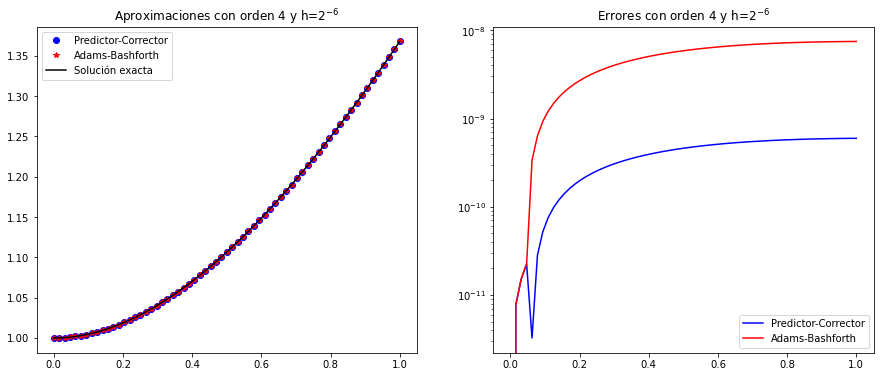

In [63]:
# Gráficas con orden 4 y h=2^(-6)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S46[:,0],S46[:,1],'ob',label='Predictor-Corrector')
plt.plot(AB46[:,0],AB46[:,1],'*r',label='Adams-Bashforth')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 4 y h=$2^{-6}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S46[:,0],E46,'b',label='Predictor-Corrector')
plt.plot(AB46[:,0],EAB46,'r',label='Adams-Bashforth')
plt.title('Errores con orden 4 y h=$2^{-6}$')
plt.legend(loc='best')
plt.yscale("log")

En todas las anteriores gráficas se observa que fijados un orden y un $h$, el método de Adams-Bashforth da mayores errores que el Predictor-Corrector. Esto es debido a que en este último, se utiliza el Adams-Bashforth para predecir el valor de la solución, y luego se corrige usando el Adams-Moulton, obteniendo una mejor aproximación que si solo se aplica el método de Adams-Bashforth.

In [26]:
# Predictor-Corrector aplicando 2 veces el corrector
S23c2 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**3,corrector=2)
S26c2 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**6,corrector=2)

S43c2 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**3,corrector=2)
S46c2 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**6,corrector=2)

# Errores
E23c2 = abs(S23c2[:,1]-SolEx3)
E26c2 = abs(S26c2[:,1]-SolEx6)
E43c2 = abs(S43c2[:,1]-SolEx3)
E46c2 = abs(S46c2[:,1]-SolEx6)

# Predictor-Corrector aplicando 3 veces el corrector
S23c3 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**3,corrector=3)
S26c3 = DESOLVE_PC(pvi, rng,orden=2,pasos=2**6,corrector=3)

S43c3 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**3,corrector=3)
S46c3 = DESOLVE_PC(pvi, rng,orden=4,pasos=2**6,corrector=3)

# Errores
E23c3 = abs(S23c3[:,1]-SolEx3)
E26c3 = abs(S26c3[:,1]-SolEx6)
E43c3 = abs(S43c3[:,1]-SolEx3)
E46c3 = abs(S46c3[:,1]-SolEx6)

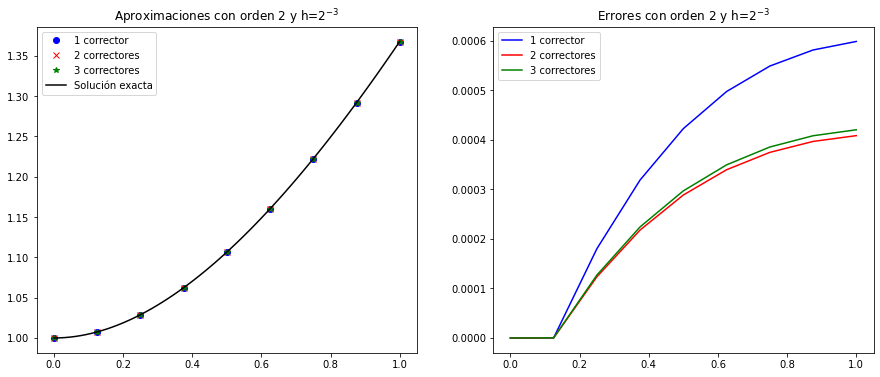

In [27]:
# Gráficas con orden 2 y h=2^(-3)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S23[:,0],S23[:,1],'ob',label='1 corrector')
plt.plot(S23c2[:,0],S23c2[:,1],'xr',label='2 correctores')
plt.plot(S23c3[:,0],S23c3[:,1],'*g',label='3 correctores')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 2 y h=$2^{-3}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S23[:,0],E23,'b',label='1 corrector')
plt.plot(S23c2[:,0],E23c2,'r',label='2 correctores')
plt.plot(S23c3[:,0],E23c3,'g',label='3 correctores')
plt.title('Errores con orden 2 y h=$2^{-3}$')
plt.legend(loc='best')

En este caso observamos que con orden 2 y $h=2^{-3}$, se obtienen errores mayores aplicando una única vez el corrector. Al aplicarlo 2 veces, los errores disminuyen, sin embargo, si se aplica 3 veces el corrector, los errores son un poco mayores que con 2 veces, aunque no hay una gran diferencia entre ambos.

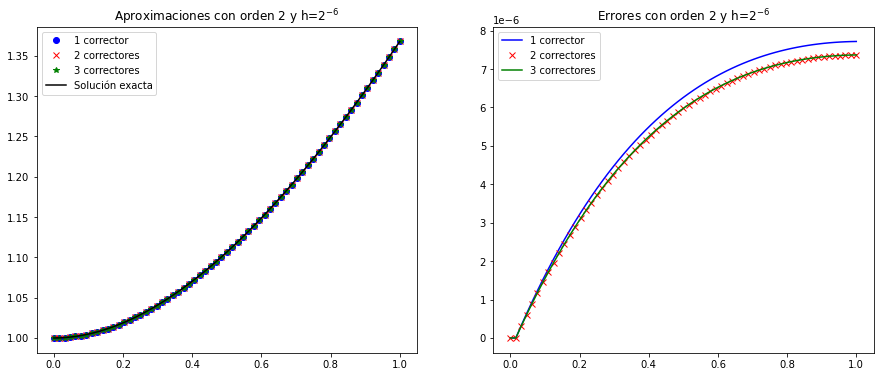

In [28]:
# Gráficas con orden 2 y h=2^(-6)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S26[:,0],S26[:,1],'ob',label='1 corrector')
plt.plot(S26c2[:,0],S26c2[:,1],'xr',label='2 correctores')
plt.plot(S26c3[:,0],S26c3[:,1],'*g',label='3 correctores')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 2 y h=$2^{-6}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S26[:,0],E26,'b',label='1 corrector')
plt.plot(S26c2[:,0],E26c2,'xr',label='2 correctores')
plt.plot(S26c3[:,0],E26c3,'g',label='3 correctores')
plt.title('Errores con orden 2 y h=$2^{-6}$')
plt.legend(loc='best')

Con orden 2 y $h=2^{-6}$, si se aplica una única vez el corrector se obtienen errores mayores que aplicándolo 2 o 3 veces. Sin embargo, tanto si se aplica 2 como si se aplica 3 veces, los errores son iguales, por lo que no convendría aplicarlo más de 2 veces. 

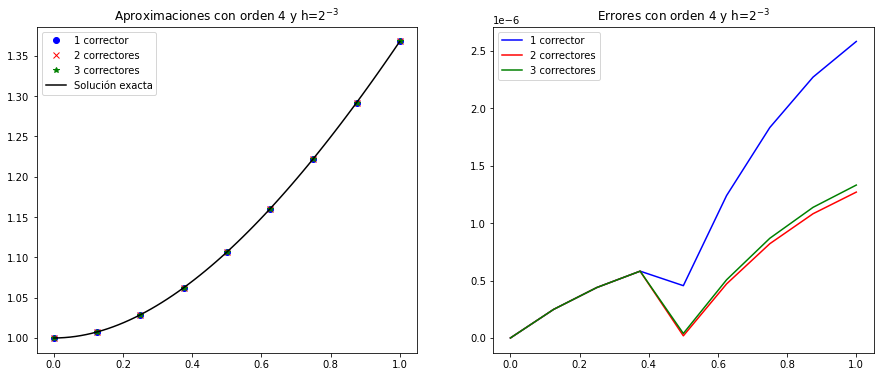

In [29]:
# Gráficas con orden 4 y h=2^(-3)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S43[:,0],S43[:,1],'ob',label='1 corrector')
plt.plot(S43c2[:,0],S43c2[:,1],'xr',label='2 correctores')
plt.plot(S43c3[:,0],S43c3[:,1],'*g',label='3 correctores')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 4 y h=$2^{-3}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S43[:,0],E43,'b',label='1 corrector')
plt.plot(S43c2[:,0],E43c2,'r',label='2 correctores')
plt.plot(S43c3[:,0],E43c3,'g',label='3 correctores')
plt.title('Errores con orden 4 y h=$2^{-3}$')
plt.legend(loc='best')

Para orden 4 y $h=2^{-3}$, los errores al principio son iguales, pero al llegar a $0.4$ vemos que para 1 corrector diminuyen un poco, mientras que para 2 y 3 correctores disminuyen más, para luego volver a aumentar a partir de $0.5$. Con 1 corrector aumentan mucho más que con 2 y 3 correctores, aunque entre estos dos últimos, los errores se hacen algo mayores con 3 correctores que con 2, a pesar de que la diferencia no es muy grande.

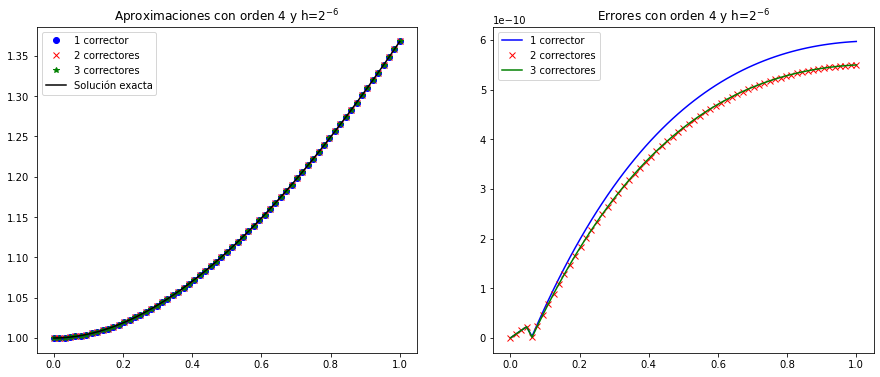

In [30]:
# Gráficas con orden 4 y h=2^(-6)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S46[:,0],S46[:,1],'ob',label='1 corrector')
plt.plot(S46c2[:,0],S46c2[:,1],'xr',label='2 correctores')
plt.plot(S46c3[:,0],S46c3[:,1],'*g',label='3 correctores')
plt.plot(S26[:,0],SolEx6,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 4 y h=$2^{-6}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S46[:,0],E46,'b',label='1 corrector')
plt.plot(S46c2[:,0],E46c2,'xr',label='2 correctores')
plt.plot(S46c3[:,0],E46c3,'g',label='3 correctores')
plt.title('Errores con orden 4 y h=$2^{-6}$')
plt.legend(loc='best')

En el caso de orden 4 y $h=2^{-6}$, los errores al principio aumentan un poco para luego disminuir y a continuación volver a aumentar, aunque en el caso de aplicar el corrector una vez se hacen algo mayores que si se aplica 2 o 3 veces el corrector. En estos dos últimos casos, vemos que los errores coinciden, por lo que sería suficiente con aplicar 2 veces el corrector.

<font size="5"> **Ejercicio 4**  </font> 

Dado el P.V.I.  $y’=y-x^2+1$ con c.i. $y(0)=\frac{1}{2}$ que tiene como solución exacta $y(x) = (x+1)^2-0.5 \cdot e^{x}$.

  a)  Usar  el  procedimiento  programado  en  el  Ejercicio  2  para  resolver  el  P.V.I.  en  el  intervalo $[0,\,4]$, con ordenes $2$, $3$  $4$, y con  tamaños de paso $2^{-k}$, para k= 2 y 4. Analizar el efecto del orden y del tamaño de paso en el error cometido

  b) Utilizando soln1 = True, compara las soluciones de orden 3 del apartado anterior con las soluciones que se obtienen, para los mismos tamaños de paso, llamando a la función con orden = 2 y soln1 = True. Haz lo mismo comparando con las soluciones de orden 4 del apartado anterior y llamando a la función con orden = 3 y soln1 = True. (<span style="color:red"> **OPCIONAL**</span> )

In [44]:
def f4(x,y):
    return y-x**2+1

pvi = [f4,[0,1/2]]
rng = [0,4]

# Predictor-Corrector
S22 = DESOLVE_PC(pvi, rng,orden=2,pasos=4*2**2)
S24 = DESOLVE_PC(pvi, rng,orden=2,pasos=4*2**4)

S32 = DESOLVE_PC(pvi, rng,orden=3,pasos=4*2**2)
S34 = DESOLVE_PC(pvi, rng,orden=3,pasos=4*2**4)

S42 = DESOLVE_PC(pvi, rng,orden=4,pasos=4*2**2)
S44 = DESOLVE_PC(pvi, rng,orden=4,pasos=4*2**4)

# Solución exacta
def f4_sol(x):
    return (x+1)**2-0.5*np.exp(x)

x = np.linspace(0,4,100)
SolEx = f4_sol(x)

SolEx2 = f4_sol(S22[:,0])
SolEx4 = f4_sol(S24[:,0])

# Errores
E22 = abs(S22[:,1]-SolEx2)
E24 = abs(S24[:,1]-SolEx4)
E32 = abs(S32[:,1]-SolEx2)
E34 = abs(S34[:,1]-SolEx4)
E42 = abs(S42[:,1]-SolEx2)
E44 = abs(S44[:,1]-SolEx4)

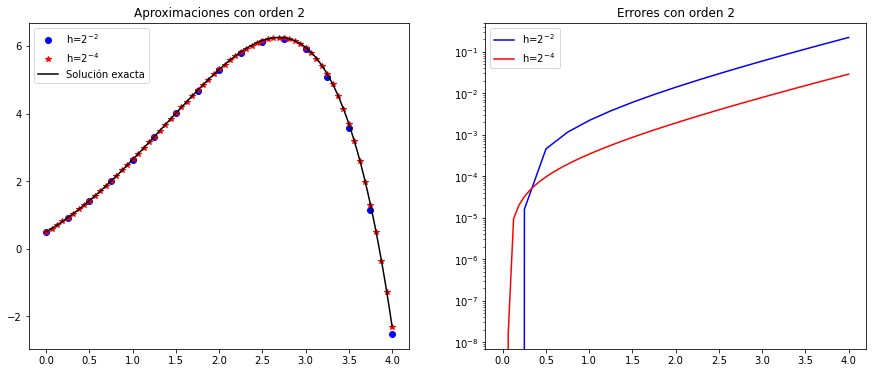

In [64]:
# Gráficas para orden 2

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S22[:,0],S22[:,1],'ob',label='h=$2^{-2}$')
plt.plot(S24[:,0],S24[:,1],'*r',label='h=$2^{-4}$')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 2')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S22[:,0],E22,'b',label='h=$2^{-2}$')
plt.plot(S24[:,0],E24,'r',label='h=$2^{-4}$')
plt.title('Errores con orden 2')
plt.legend(loc='best')
plt.yscale("log")

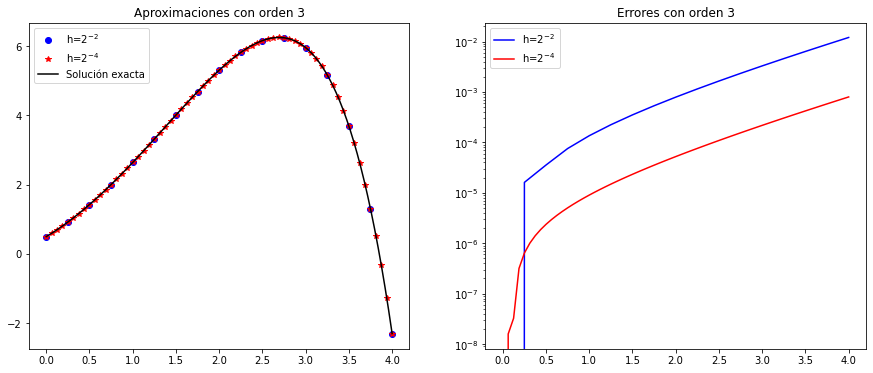

In [65]:
# Gráficas para orden 3

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S32[:,0],S32[:,1],'ob',label='h=$2^{-2}$')
plt.plot(S34[:,0],S34[:,1],'*r',label='h=$2^{-4}$')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 3')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S32[:,0],E32,'b',label='h=$2^{-2}$')
plt.plot(S34[:,0],E34,'r',label='h=$2^{-4}$')
plt.title('Errores con orden 3')
plt.legend(loc='best')
plt.yscale("log")

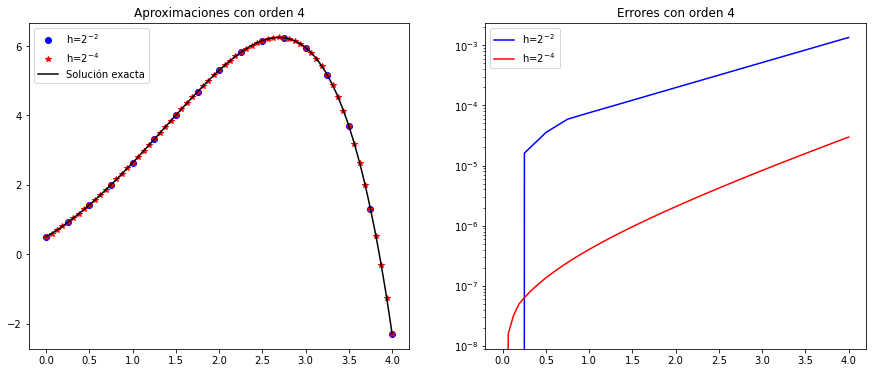

In [66]:
# Gráficas para orden 4

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S42[:,0],S42[:,1],'ob',label='h=$2^{-2}$')
plt.plot(S44[:,0],S44[:,1],'*r',label='h=$2^{-4}$')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con orden 4')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S42[:,0],E42,'b',label='h=$2^{-2}$')
plt.plot(S44[:,0],E44,'r',label='h=$2^{-4}$')
plt.title('Errores con orden 4')
plt.legend(loc='best')
plt.yscale("log")

Vemos que para cualquiera de los órdenes, se tiene que los errores son menores para $h=2^{-4}$ que para $h=2^{-2}$, es decir, son menores cuanto menor es el tamaño de paso $h$.

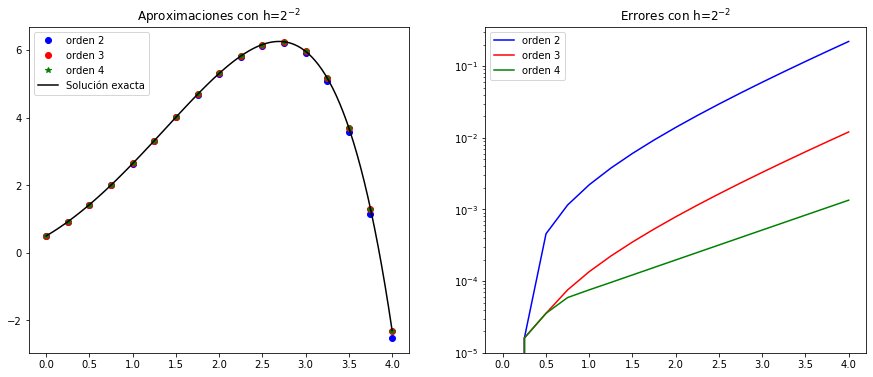

In [48]:
# Gráficas para h=2^(-2)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S22[:,0],S22[:,1],'ob',label='orden 2')
plt.plot(S32[:,0],S32[:,1],'or',label='orden 3')
plt.plot(S42[:,0],S42[:,1],'*g',label='orden 4')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-2}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S22[:,0],E22,'b',label='orden 2')
plt.plot(S32[:,0],E32,'r',label='orden 3')
plt.plot(S42[:,0],E42,'g',label='orden 4')
plt.title('Errores con h=$2^{-2}$')
plt.legend(loc='best')
plt.yscale("log")

Para $h=2^{-2}$, se observa que los mayores errores se obtienen con orden 2, seguidos de los de orden 3, y por último los de orden 4, que son los menores errores.

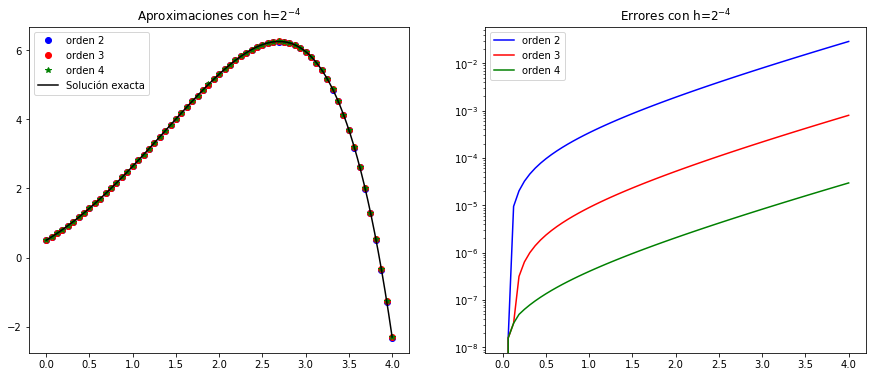

In [49]:
# Gráficas para h=2^(-4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S24[:,0],S24[:,1],'ob',label='orden 2')
plt.plot(S34[:,0],S34[:,1],'or',label='orden 3')
plt.plot(S44[:,0],S44[:,1],'*g',label='orden 4')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-4}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S24[:,0],E24,'b',label='orden 2')
plt.plot(S34[:,0],E34,'r',label='orden 3')
plt.plot(S44[:,0],E44,'g',label='orden 4')
plt.title('Errores con h=$2^{-4}$')
plt.legend(loc='best')
plt.yscale("log")

Para $h=2^{-4}$, los mayores errores se obtienen para orden 2, y los menores se obtienen para orden 4, es decir, a mayor orden, menor es el error cometido, al igual que en el caso anterior.

In [37]:
# Con soln1 = True
S22n1 = DESOLVE_PC(pvi, rng,orden=2,pasos=4*2**2,soln1 = "True")
S24n1 = DESOLVE_PC(pvi, rng,orden=2,pasos=4*2**4,soln1 = "True")

S32n1 = DESOLVE_PC(pvi, rng,orden=3,pasos=4*2**2,soln1 = "True")
S34n1 = DESOLVE_PC(pvi, rng,orden=3,pasos=4*2**4,soln1 = "True")

# Errores
E22n1 = abs(S22n1[:,1]-SolEx2)
E24n1 = abs(S24n1[:,1]-SolEx4)
E32n1 = abs(S32n1[:,1]-SolEx2)
E34n1 = abs(S34n1[:,1]-SolEx4)

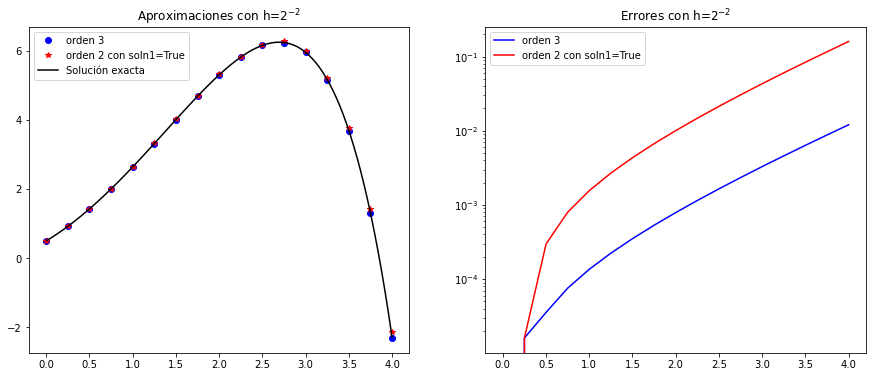

In [54]:
# Gráficas para orden 3 y orden 2 con soln1=True, para h=2^(-2)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S32[:,0],S32[:,1],'ob',label='orden 3')
plt.plot(S22n1[:,0],S22n1[:,1],'*r',label='orden 2 con soln1=True')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-2}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S32[:,0],E32,'b',label='orden 3')
plt.plot(S22n1[:,0],E22n1,'r',label='orden 2 con soln1=True')
plt.title('Errores con h=$2^{-2}$')
plt.legend(loc='best')
plt.yscale("log")

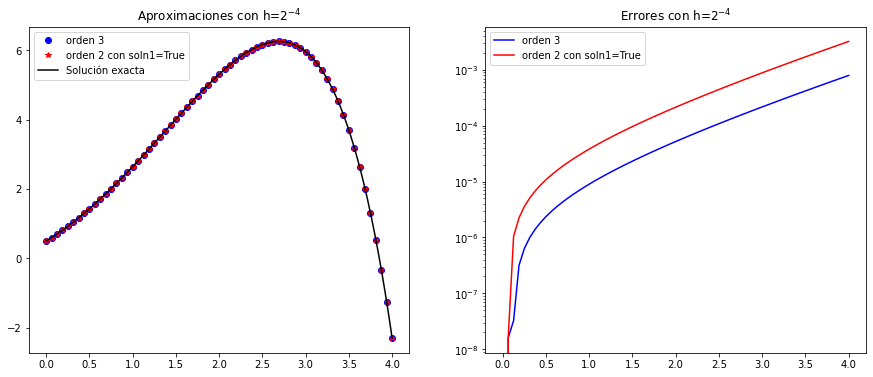

In [55]:
# Gráficas para orden 3 y orden 2 con soln1=True, para h=2^(-4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S34[:,0],S34[:,1],'ob',label='orden 3')
plt.plot(S24n1[:,0],S34n1[:,1],'*r',label='orden 2 con soln1=True')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-4}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S34[:,0],E34,'b',label='orden 3')
plt.plot(S24n1[:,0],E24n1,'r',label='orden 2 con soln1=True')
plt.title('Errores con h=$2^{-4}$')
plt.legend(loc='best')
plt.yscale("log")

Vemos que para ambos tamaños de paso, los errores cometidos con orden 3 son menores que con orden 2 y soln1="True".

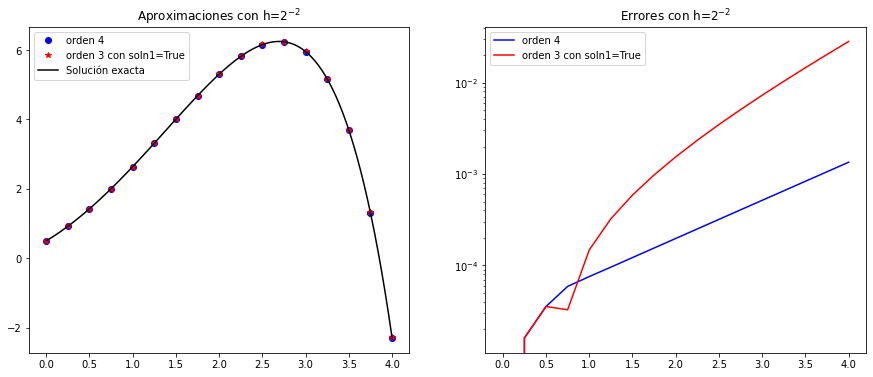

In [57]:
# Gráficas para orden 4 y orden 3 con soln1=True, para h=2^(-2)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S42[:,0],S42[:,1],'ob',label='orden 4')
plt.plot(S32n1[:,0],S32n1[:,1],'*r',label='orden 3 con soln1=True')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-2}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S42[:,0],E42,'b',label='orden 4')
plt.plot(S32n1[:,0],E32n1,'r',label='orden 3 con soln1=True')
plt.title('Errores con h=$2^{-2}$')
plt.legend(loc='best')
plt.yscale("log")

Para $h=2^{-2}$, vemos que al principio los errores con orden 3 y soln1="True" y los de orden 4 coinciden hasta el punto$0.5$, donde los de orden 4 se hacen mayores. Sin embargo, poco antes de llegar al punto $1$, los errores de orden 3 y soln1="True" superan a los de orden 4, de forma que al final del intervalo, los menores errores se obtienen con orden 4.

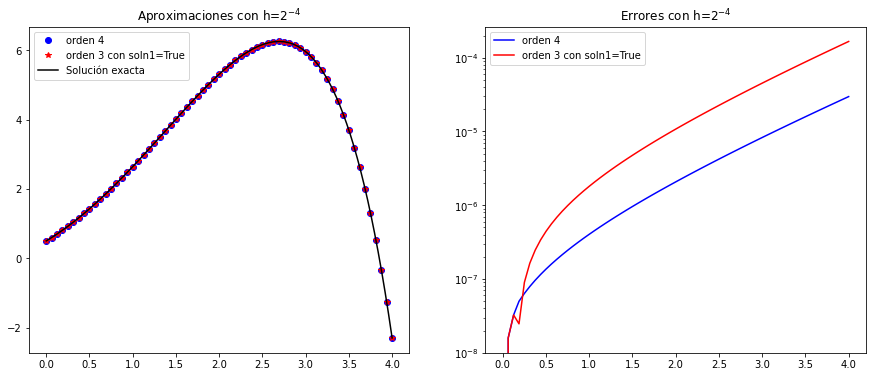

In [56]:
# Gráficas para orden 4 y orden 3 con soln1=True, para h=2^(-4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S44[:,0],S44[:,1],'ob',label='orden 4')
plt.plot(S34n1[:,0],S34n1[:,1],'*r',label='orden 3 con soln1=True')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con h=$2^{-4}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S44[:,0],E44,'b',label='orden 4')
plt.plot(S34n1[:,0],E34n1,'r',label='orden 3 con soln1=True')
plt.title('Errores con h=$2^{-4}$')
plt.legend(loc='best')
plt.yscale("log")

Para $h=2^{-4}$, ocurre algo similar al caso anterior, pues al principio ambos errores coinciden, aunque poco después los de orden 4 se hacen algo mayores, aunque en seguida los errores de la solución de orden 3 con soln1="True" superan a los de la de orden 4. De esta forma, al final del intervalo los errores menores son los obtenidos con orden 4.